In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/Pokemon.csv')

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
f=df[df['Generation']==5]

In [ ]:
f.shape

(165, 13)

In [ ]:
#ans 165

In [ ]:
df[df['Defense']==df['Defense'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


In [ ]:
#ans 3

In [ ]:
df.isnull().sum().sum()

386

In [ ]:
#Fill the null values with mean()

How you will be handling missing values in this dataset:
 a. Fill up the null values with the median.
 b. Fill up the null values with standard deviation.
 c. Fill up the null values with the mean.
 d. Fill up the null values with None

<ipython-input-237-22a93edfd9da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Defense"])


<Axes: xlabel='Defense', ylabel='Density'>

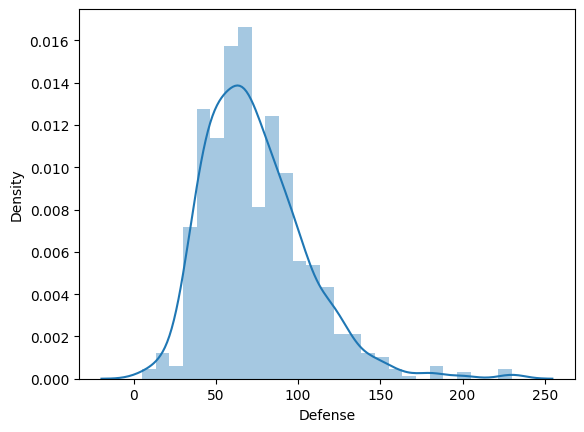

In [ ]:
sns.distplot(df["Defense"])

<ipython-input-238-de417d7e2c28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Speed"])


<Axes: xlabel='Speed', ylabel='Density'>

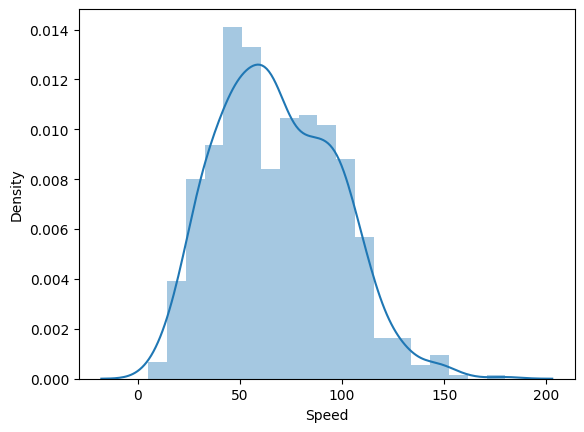

In [ ]:

sns.distplot(df["Speed"])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: xlabel='Defense'>

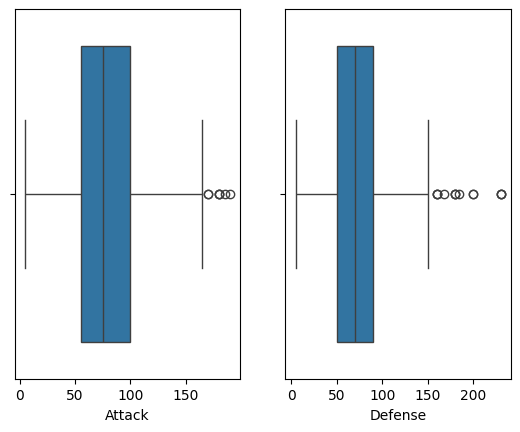

In [ ]:
figure,axes=plt.subplots(nrows=1,ncols=2)
sns.boxplot(x='Attack',data=df,ax=axes[0],orient='v')
sns.boxplot(x='Defense',data=df,ax=axes[1],orient='v')

In [ ]:
#fill the missing values with median

In [ ]:
cols=list(df.columns)

In [ ]:
fg=df.loc[:,'Total':'Generation']

In [ ]:
fg.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


<Axes: >

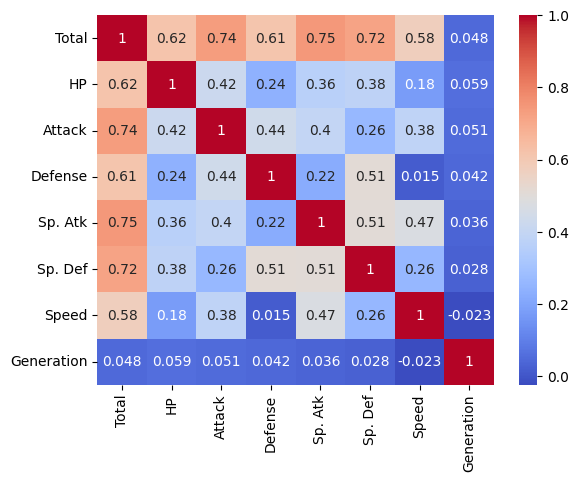

In [ ]:
sns.heatmap(fg.corr(),annot=True,cmap='coolwarm')

In [ ]:
#ans Both of the above

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
X=df.drop(['Legendary'],axis=1)
y=df['Legendary']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df=df.apply(le.fit_transform)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,80,9,13,57,17,24,23,41,37,24,0,0
1,1,329,9,13,94,31,37,37,55,50,38,0,0
2,2,745,9,13,165,51,57,55,71,66,58,0,0
3,2,746,9,13,188,51,73,86,86,77,58,0,0
4,3,102,6,18,51,11,27,18,36,22,43,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,718,160,15,4,184,21,73,96,71,87,29,5,1
796,718,161,15,4,196,21,104,76,99,73,85,5,1
797,719,314,14,8,184,51,82,34,96,83,48,5,1
798,719,315,14,1,195,51,104,34,101,83,58,5,1


In [ ]:
X=df.drop(['Legendary'],axis=1)
y=df['Legendary']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       220
           1       0.76      0.80      0.78        20

    accuracy                           0.96       240
   macro avg       0.87      0.89      0.88       240
weighted avg       0.96      0.96      0.96       240



. What is the precision of the Decision Tree model when the target is False?
 a. 0.90 to 0.1
 b. 0.80 to 0.90
 c. 1.0 to 2.0
 d. 0.50 to 0.60

In [ ]:
#0.98 #(a)Ans

What is the sensitivity of the above model when the target is True?
 a. 0.90 to 1.0
 b. 0.50 to 0.60
 c. 0.60 to 0.70
 d. 0.30 to 0.40

In [ ]:
confusion_matrix(y_pred,y_test)

array([[215,   5],
       [  4,  16]])

3.How we can avoid the overfitting in Decision Tree
 a. Stopping the Tree Growth
 b. Pruning the Full Grown Tree
 c. Both of above
 d. None of the Abov

Which of the following is true for the Decision Tree?
 a. The model can able to generate understandable rules
 b. The model can able to handle both continuous and categorical
 variables
 c. It can able to perform classification without requiring much computation
 d. All of the above

In [ ]:
accuracy_score(y_test,y_pred)

0.9625

In [ ]:
#Ans (D)All of the above

In [ ]:
#Both OFthe ABove is the answer

The total gain is computed by adding the expected value of each
 outcome and deducting the costs associated with the decision.
 a. True
 b. False

In [ ]:
#ANs True

.Suppose, you have to work with an ML problem, where you have to predict
 the number of oxygen tanks needed to be shipped from Indonesia. Which
 of the following ML algorithm you will choose:
 a. Logistic regression
 b. Decision Tree
 c. Both of the above
d. None of the above

In [ ]:
#Decision Tree

 9. Decision tree models might create some biased trees if some classes
 dominate. From the below options which action is best to take so that it
 won't create biased trees:
 a. balance the dataset prior to fitting
 b. imbalance the dataset prior to fitting
 c. balance the dataset after fitting
 d. None of the above

In [ ]:
#Balance the dataset Prior to fitting

<ipython-input-268-067c91dd6380>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Legendary'])


<Axes: xlabel='Legendary', ylabel='Density'>

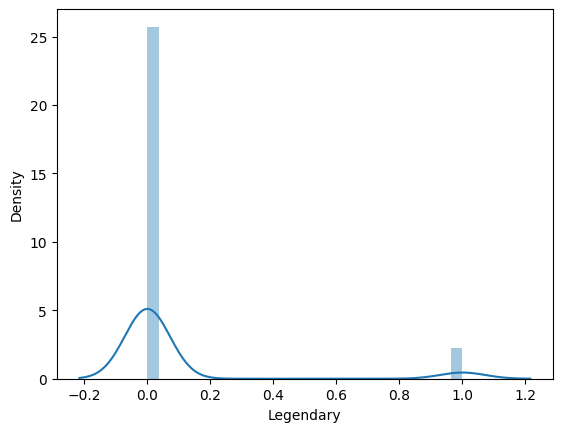

In [ ]:
sns.distplot(df['Legendary'])

In [ ]:
df['Legendary'].value_counts()

,count
Legendary,
0,735
1,65
